## imports

In [37]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
import cv2
import random

# Part 1

## load dataset

In [38]:
def load_dataset():
  image_pickle_file_path = 'images.pkl'
  label_pickle_file_path = 'label.pkl'

  with open(image_pickle_file_path, 'rb') as file:
    images = pickle.load(file)

  with open(label_pickle_file_path, 'rb') as file:
    labels = pickle.load(file)

  # images = images.reshape(images.shape[0], -1)

  return images, labels

In [39]:
images, labels = load_dataset()
# images = images[200:202]
# # Choose a random index along the first axis
random_indices = np.random.choice(560, size=20, replace=False)
# Extract the randomly selected values
random_values = images[random_indices]


## Proccess on images
- Extract features
- normalize features
- make features a single dimnetion vector

In [103]:
def extract_features(images):
    features = []
    original_features = []

    # For each image in the dataset
    for img in images:

        # Reshape the image back to a 2D array
        # img_hsv = img_hsv.reshape((height, width, 3))
        height, width, _ = img.shape
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # For each pixel in the image
        for i in range(img_hsv.shape[0]):
            for j in range(img_hsv.shape[1]):
                pixel = img_hsv[i, j]
                h, s, v = pixel
                x, y = i, j

                original_features.append((h,s,v,x,y))

                h_weight = 10
                s_weight = 1
                v_weight = 1
                x_weight = 0
                y_weight = 0
                h, s, v = h * h_weight, s * s_weight, v * v_weight
                x, y = x * x_weight, y * y_weight

                features.append((h, s, v, x, y))

    return features, original_features

In [104]:
def normalize_features(features):
    features_array = np.array(features)
    scaler = StandardScaler()
    normalized_features_array = scaler.fit_transform(features_array)
    normalized_features = normalized_features_array.tolist()
    return normalized_features

In [105]:
def process_images_in_chunks(images, chunk_size):
    features = []
    original_features = []
    num_images = len(images)

    for i in range(0, num_images, chunk_size):
        # Extract features for a chunk of images
        chunk_features, chunk_original_features = extract_features(images[i:i+chunk_size])

        # Append the features to the overall features list
        features.extend(chunk_features)
        original_features.extend(chunk_original_features)

        print('<<', i, '>>')

    return features, original_features


In [106]:
# extract features
chunk_size = 10
# features, original_features = process_images_in_chunks(images, chunk_size)
features, original_features = process_images_in_chunks(random_values, chunk_size)

<< 0 >>
<< 10 >>


In [107]:
# normalize features
features = normalize_features(features)

## clustering

### k-means

In [206]:
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(features)
# clusters = clusters.reshape(images.shape[0], images.shape[1], images.shape[2])
clusters = clusters.reshape(random_values.shape[0], random_values.shape[1], random_values.shape[2])

d:\ProgramFiles\Anaconda\envs\slomo\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### db-scan

In [46]:
# dbscan = DBSCAN(eps=50, min_samples=5)
# clusters = dbscan.fit_predict(features)
# clusters = clusters.reshape(images.shape[0], images.shape[1], images.shape[2])

### db-scann

In [47]:
# import numpy as np
# from sklearn.cluster import DBSCAN

# # Apply DBSCAN with parallelization
# db = DBSCAN(eps=0.5, min_samples=10).fit(features)
# labels = db.labels_

# # Number of clusters in labels,a ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print("Estimated number of clusters: %d" % n_clusters_)
# print("Estimated number of noise points: %d" % n_noise_)

### mean-shift

In [48]:
# import numpy as np
# from sklearn.cluster import MeanShift, estimate_bandwidth

# # Estimate bandwidth (this can be adjusted based on your data)
# bandwidth = estimate_bandwidth(features, quantile=0.2, n_samples=500)

# # Apply Mean Shift
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(features)

# # Access cluster labels and cluster centers
# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

# # Number of clusters
# n_clusters_ = len(np.unique(labels))

# print("Estimated number of clusters: %d" % n_clusters_)
# print("Estimated number of noise points: %d" % n_noise_)


## Plot

#### 3D

In [49]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # Importing the 3D plotting toolkit

# # Example data (replace this with your actual data)
# vectors = np.array(original_features)
# cluster_labels = clusters.reshape(clusters.shape[0]*clusters.shape[1]*clusters.shape[2])

# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot vectors with different colors based on their clusters
# for cluster_label in np.unique(cluster_labels):
#     mask = (cluster_labels == cluster_label)
#     ax.scatter(vectors[mask, 3], vectors[mask, 4], vectors[mask, 2], label=f'Cluster {cluster_label}')

# # Set labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # Add a legend
# ax.legend()

# # Show the 3D plot
# plt.show()


#### 2D

In [50]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Example data (replace this with your actual data)
# vectors = np.array(original_features)
# cluster_labels = clusters.reshape(clusters.shape[0]*clusters.shape[1]*clusters.shape[2])

# # Plot vectors with different colors based on their clusters
# for cluster_label in np.unique(cluster_labels):
#     mask = (cluster_labels == cluster_label)
#     plt.scatter(vectors[mask, 3], vectors[mask, 4], label=f'Cluster {cluster_label}')

# # Set labels
# plt.xlabel('X')
# plt.ylabel('Y')

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()


### plot db-scan

In [51]:
# # @title Default title text
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler

# featuress = StandardScaler().fit_transform(features)

# unique_labels = set(labels)
# core_samples_mask = np.zeros_like(labels, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True

# colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]

#     class_member_mask = labels == k

#     xy = featuress[class_member_mask & core_samples_mask]
#     plt.plot(
#         xy[:, 0],
#         xy[:, 1],
#         ".",
#         markerfacecolor=tuple(col),
#         markeredgecolor="k",
#         markersize=14,
#     )

#     xy = featuress[class_member_mask & ~core_samples_mask]
#     plt.plot(
#         xy[:, 0],
#         xy[:, 1],
#         "o",
#         markerfacecolor=tuple(col),
#         markeredgecolor="k",
#         markersize=6,
#     )

# plt.title(f"Estimated number of clusters: {n_clusters_}")
# plt.show()

### plot mean-shift

In [52]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from itertools import cycle
# import numpy as np

# def plot_mean_shift_clusters_3d(features, labels, cluster_centers):
#     # Number of clusters
#     n_clusters = len(cluster_centers)

#     # Define colors for plotting
#     colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

#     fig = plt.figure(figsize=(12, 8))
#     ax = fig.add_subplot(111, projection='3d')

#     for k, col in zip(range(n_clusters), colors):
#         cluster_points = np.array(features)[labels == k]
#         ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=col, marker='.', s=50, edgecolors='k')

#         # Mark the cluster center
#         cluster_center = cluster_centers[k]
#         ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], c=col, marker='x', s=200, edgecolors='k')

#     ax.set_title('Mean Shift Clustering (3D)')
#     ax.set_xlabel('Feature 1')
#     ax.set_ylabel('Feature 2')
#     ax.set_zlabel('Feature 3')

#     plt.show()

# # Example usage:
# # Assuming you have a 5D feature array, replace it with your actual feature array
# # Replace 'features', 'labels', and 'cluster_centers' with your actual variable names
# plot_mean_shift_clusters_3d(features, labels, cluster_centers)


## display clustering

In [ ]:
# Calculate the mean color for each cluster
def cluster_mean_value(kmeans, clusters):
    cluster_means = []
    for cluster in range(kmeans.n_clusters):
        mask = (clusters == cluster)
        cluster_mean = np.mean(random_values * mask[:, :, :, np.newaxis], axis=(0, 1, 2)) / np.mean(mask)
        cluster_means.append(cluster_mean)
    # Convert the mean colors to integer values
    cluster_means = np.round(cluster_means).astype(int)
    return cluster_means

In [ ]:
clusters_mean = cluster_mean_value(kmeans, clusters)
# clusters_mean.reshape(clusters_mean.shape[0]*clusters_mean.shape[1])

In [ ]:
def display_clusters(cluster_means):
    # Display iپages with cluster colors
    for i, image in enumerate(random_values):
        cv2.imshow('Original', image)

        # Create a blank image for displaying clustered colors
        cluster_image = np.zeros_like(image)
        

        # Assign the mean color to each pixel based on the cluster assignment
        for cluster, mean_color in enumerate(cluster_means):
            mask = (clusters[i] == cluster)
            cluster_image[mask] = mean_color

        cv2.imshow('Clustered', cluster_image)
        cv2.waitKey(0)

    cv2.destroyAllWindows()

display_clusters(clusters_mean)

## extracting clusters features for each image sepratedly

### mean color for each cluster in each image

In [115]:
import numpy as np

def calculate_mean(first_array, second_array):
    
    mean_values = []
    unique_elements = np.unique(first_array)
        
    for element in unique_elements:
        indices = np.where(first_array == element)
        mean_hsv = np.mean(second_array[indices], axis=0)
        mean_values.append(mean_hsv.tolist())

    return mean_values

In [141]:
mean_color_each_cluster_each_image = []
for i in range(random_values.shape[0]):
    mean_values = calculate_mean(clusters[i], images[i])
    mean_color_each_cluster_each_image.append(np.array(mean_values))

mean_color_each_cluster_each_image = np.array(mean_color_each_cluster_each_image)
print(len(mean_color_each_cluster_each_image))
mean_color_each_cluster_each_image

20


array([[[157.6216193 , 127.57361078, 135.73033438],
        [146.5118664 , 118.46473459, 123.47104185],
        [134.77571955, 110.86695407, 114.2240495 ]],

       [[145.84362137, 154.74554727, 151.20010704],
        [119.44998127, 151.94492319, 139.17572124],
        [142.77346468, 147.97252568, 145.3491092 ]],

       [[ 87.7358988 ,  71.57208797,  87.83945731],
        [112.10710581,  85.52437759, 106.44026625],
        [137.54736303,  86.16538658, 114.52288233]],

       [[135.46428956, 122.78861701, 120.83392876],
        [179.1125    , 175.51875   , 172.47083333],
        [166.90645887, 125.44995491, 130.24135432]],

       [[141.92864886, 131.83937562, 129.11940838],
        [151.00035217, 102.29995048, 106.9709239 ],
        [136.97322141, 127.76182228, 123.70474949]],

       [[102.16016124, 120.50555607, 113.87108974],
        [115.09992885, 111.49460432, 111.11398134],
        [104.31898365, 117.11577035, 111.10292287]],

       [[ 80.9526489 , 126.04640567, 100.27835427],


### variance color for each cluster in each image

In [117]:
import numpy as np

def calculate_variance(first_array, second_array):
    
    variance_values = []
    unique_elements = np.unique(first_array)

    for element in unique_elements:
        indices = np.where(first_array == element)
        var_hsv = np.var(second_array[indices], axis=0)
        variance_values.append(var_hsv.tolist())

    return variance_values


In [112]:
var_color_each_cluster_each_image = []
for i in range(random_values.shape[0]):
    var_values = calculate_variance(clusters[i], random_values[i])
    var_color_each_cluster_each_image.append(np.array(var_values))

var_color_each_cluster_each_image = np.array(var_color_each_cluster_each_image)
var_color_each_cluster_each_image

array([[[ 351.97328614,  638.86190609,  462.56115137],
        [2494.62370334, 2479.37250012, 2676.58093013],
        [1813.23678057, 1077.65692697, 1056.44407672]],

       [[ 288.49604826,  602.70730875,  932.95042517],
        [2234.47776414, 2188.66727077, 2543.58725896],
        [2361.56231387, 2440.16720303, 2120.58137251]],

       [[  83.10402564,  431.54276617,  598.64914491],
        [3469.77261609, 3495.14806197, 3406.42804266],
        [5349.08413797, 1983.38644253, 1513.70179932]],

       [[ 414.51788015, 1129.01587763,  763.26567227],
        [1896.50692708, 2400.79978733, 1844.01905816],
        [4916.72200517, 1383.32809081, 1445.07336389]],

       [[ 344.39780159,  821.83430339,  819.65950053],
        [2230.01703858, 1670.98658206, 1464.6470375 ],
        [ 758.01784036, 1403.208443  , 1095.10997366]],

       [[ 378.48904479,  254.43184045,  320.65224906],
        [2727.0768338 , 1927.21076717, 1792.5459594 ],
        [ 346.25155004,  377.8579209 ,  202.30366554]],

### size of clusters in each image

In [113]:
def calculate_size(clusters):
    size_each_cluster_each_image = []

    for i in range(clusters.shape[0]):
        unique_clusters, counts = np.unique(clusters[i], return_counts=True)
        each_clusters_size = counts
        size_each_cluster_each_image.append(each_clusters_size)

    size_each_cluster_each_image = np.array(size_each_cluster_each_image)
    return size_each_cluster_each_image

In [114]:
size_each_cluster_each_image = calculate_size(clusters)
size_each_cluster_each_image

array([[ 58198,  86884, 103919],
       [127057,   2669, 119275],
       [153604,  23136,  72261],
       [129878,    480, 118643],
       [ 41513,  90865, 116623],
       [128508,  50596,  69897],
       [ 87791, 114332,  46878],
       [143894,  80197,  24910],
       [ 77216,    141, 171644],
       [134524,  43982,  70495],
       [ 98348,  26724, 123929],
       [127032,  27812,  94157],
       [ 46578, 102716,  99707],
       [101029,  99401,  48571],
       [ 94591,  77206,  77204],
       [ 18436, 159712,  70853],
       [ 70691,  88815,  89495],
       [147459,  51095,  50447],
       [181389,   7754,  59858],
       [173155,   8635,  67211]], dtype=int64)

# Part 2

## create clusters feature vectors 

In [186]:
def create_clusters_vector(clusters_mean, clusters_variance, clusters_size, clusters_area=None):
    result = []
    for mean, variance, size in zip(clusters_mean, clusters_variance, clusters_size):
        for i in range(3):
            result.append([*mean[i], *variance[i], size])
    return result

In [187]:
def flatten_nested_list(nested_list):
    return [[item for sublist in lst for item in (sublist if isinstance(sublist, list) else [sublist])] for lst in nested_list]

In [189]:
clusters_features = create_clusters_vector(mean_color_each_cluster_each_image, var_color_each_cluster_each_image, size_each_cluster_each_image)
clusters_features = flatten_nested_list(clusters_features)
clusters_features

[[157.6216192996323,
  127.57361077700264,
  135.73033437575174,
  351.97328613770617,
  638.8619060914787,
  462.56115136504695,
  array([ 58198,  86884, 103919], dtype=int64)],
 [146.51186639657473,
  118.46473458864693,
  123.47104184890199,
  2494.62370334217,
  2479.3725001150815,
  2676.5809301264285,
  array([ 58198,  86884, 103919], dtype=int64)],
 [134.77571955080398,
  110.86695406999682,
  114.22404950009141,
  1813.2367805662816,
  1077.656926966279,
  1056.4440767247158,
  array([ 58198,  86884, 103919], dtype=int64)],
 [145.84362136678814,
  154.7455472740581,
  151.20010703857324,
  288.49604825935154,
  602.7073087468341,
  932.9504251675631,
  array([127057,   2669, 119275], dtype=int64)],
 [119.4499812663919,
  151.94492319220683,
  139.17572124391157,
  2234.4777641407127,
  2188.667270765284,
  2543.587258956546,
  array([127057,   2669, 119275], dtype=int64)],
 [142.7734646824565,
  147.9725256759589,
  145.34910920142528,
  2361.562313873069,
  2440.1672030340324,

## clustering clusters

In [201]:
kmeans_2 = KMeans(n_clusters=3)
clusters_features_flat = [np.concatenate([np.array(item[:-1]), item[-1]]) for item in clusters_features]
clusters_2 = kmeans.fit_predict(clusters_features_flat)
# clusters_2 = kmeans.fit_predict(clusters_features)
clusters_2

d:\ProgramFiles\Anaconda\envs\slomo\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\ProgramFiles\Anaconda\envs\slomo\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Diaplay clustered cluster

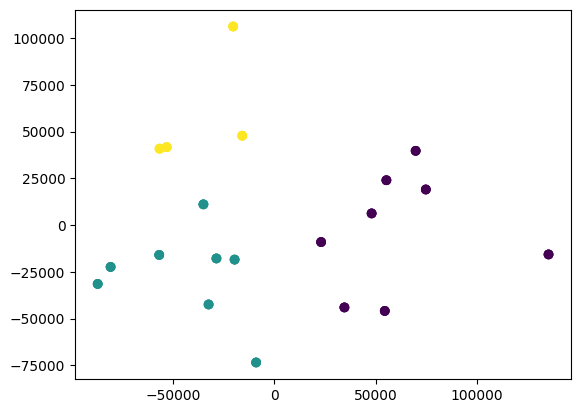

In [200]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)
data_transformed = pca.fit_transform(clusters_features_flat)

plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=clusters_2)
plt.show()
